In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
import seaborn as sns
import pandas as pd
import math as mt
import scipy
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import researchpy as rp

from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [2]:
#fig1 virE con data
dfecon = pd.read_excel('2022.3.28 virE.xlsx',sheet_name='data')
dfecon['GFP_log'] = dfecon.GFP.apply(np.log2)
dfecon = dfecon.dropna()
dfecon.Strain = dfecon.Strain.str.replace("p",'J23')
dfecon.head()

,Well,GFP,Strain,Leaf,GFP_log
0,A1,231980,WT,A,17.823641
1,A2,216005,WT,A,17.720705
2,A3,290331,WT,A,18.147339
3,A4,176794,WT,A,17.431710
4,A5,272143,WT,B,18.054005


In [3]:
dfeconsum=rp.summary_cont(dfecon['GFP'].groupby(dfecon['Strain']))
dfeconsum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
J23100,20,140903.50,58929.5468,13177.0473,113323.6231,168483.3769
J23101,20,165060.50,63878.9696,14283.7718,135164.2219,194956.7781
J23111,20,148495.30,46368.1982,10368.2443,126794.3153,170196.2847
J23114,20,28570.10,9456.4011,2114.5156,24144.3680,32995.8320
J23117,20,220676.15,102839.4874,22995.6084,172545.7884,268806.5116
Leaf,12,630.75,35.0665,10.1228,608.4698,653.0302
WT,20,213017.50,105887.6134,23677.1902,163460.5715,262574.4285
ΔvirE12,20,1828.15,310.1749,69.3572,1682.9837,1973.3163


In [4]:
compdfecon = mc.MultiComparison(dfecon['GFP'], dfecon['Strain'])
tbldfecon, a1dfecon, a2dfecon = compdfecon.allpairtest(stats.ttest_ind, method= "bonf")
print(tbldfecon)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.002
group1  group2   stat    pval  pval_corr reject
-----------------------------------------------
J23100  J23101  -1.2431 0.2215       1.0  False
J23100  J23111  -0.4528 0.6533       1.0  False
J23100  J23114   8.4172    0.0       0.0   True
J23100  J23117  -3.0099 0.0046    0.1295  False
J23100    Leaf   8.1913    0.0       0.0   True
J23100      WT  -2.6613 0.0113    0.3176  False
J23100 ΔvirE12  10.5542    0.0       0.0   True
J23101  J23111   0.9385 0.3539       1.0  False
J23101  J23114   9.4526    0.0       0.0   True
J23101  J23117  -2.0545 0.0469       1.0  False
J23101    Leaf    8.858    0.0       0.0   True
J23101      WT  -1.7343  0.091       1.0  False
J23101 ΔvirE12  11.4277    0.0       0.0   True
J23111  J23114  11.3333    0.0       0.0   True
J23111  J23117  -2.8615 0.0068     0.191  False
J23111    Leaf  10.9738    0.0       0.0   True
J23111      WT  -2.4962  0.017    0.4762  F

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/2262030291.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('virE_con_fig1.png',kind='png',dpi=300,bbox_inches='tight')


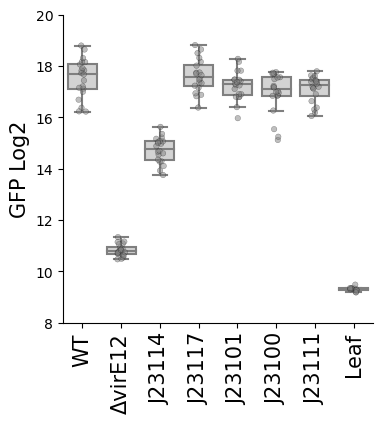

In [5]:
my_ko_pal = {Strain: "lightgrey" for Strain in dfecon.Strain.unique()}




plt.figure(figsize=(4,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfecon,palette=my_ko_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfecon,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.savefig('virE_con_fig1.png',kind='png',dpi=300,bbox_inches='tight')

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/4062255517.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('virE_conprot_fig1.png',kind='png',dpi=300,bbox_inches='tight')


<Figure size 400x400 with 0 Axes>

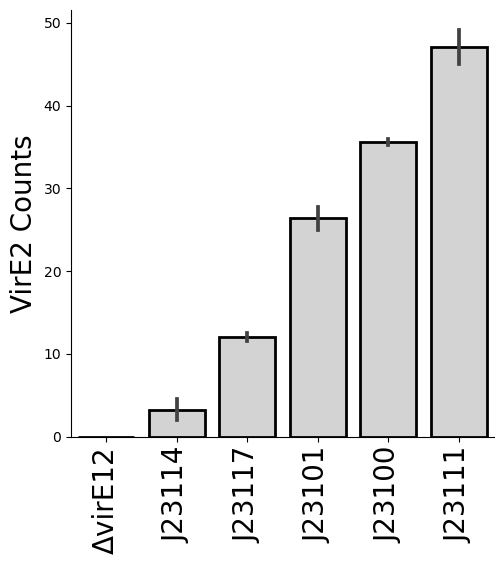

In [6]:
#virE con proteomics
df_virEprot = pd.read_excel('virE_comp_vironly.xlsx',sheet_name='data_E')



df_virEprot=df_virEprot[df_virEprot.Strain.isin(['ΔvirE12', 'ΔvirE12 p100', 'ΔvirE12 p101',
       'ΔvirE12 p111', 'ΔvirE12 p114', 'ΔvirE12 p117'])]
df_virEprot.Strain = df_virEprot.Strain.str.replace("ΔvirE12 p",'J23')

my_ko_pal = {Strain: "lightgrey" for Strain in df_virEprot.Strain.unique()}

plt.figure(figsize=(4,4))

sns.catplot(x='Strain',y='Count',data=df_virEprot[df_virEprot.Protein=='virE2'],palette=my_ko_pal,
           kind='bar',edgecolor='black',linewidth=2,
           order=['ΔvirE12', 'J23114','J23117','J23101', 'J23100',
       'J23111'])

sns.despine(top=True, right=True)
plt.xlabel('')
plt.ylabel('VirE2 Counts',fontsize=20)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=20, rotation=90)
plt.savefig('virE_conprot_fig1.png',kind='png',dpi=300,bbox_inches='tight')


In [7]:
#virE inducible fig1
dfeind = pd.read_excel('2022.5.2 induc virE vire123 comp.xlsx',sheet_name='data')
dfeind = dfeind[dfeind.Plant != "Empty"]
dfeind['GFP_log'] = dfeind.GFP.apply(np.log2)
dfeind = dfeind.dropna()
dfeind.Strain = dfeind.Strain.str.replace("B1S",'LacI')
dfeind.Strain = dfeind.Strain.str.replace("B2S",'TetR')
dfeind.Strain = dfeind.Strain.str.replace("B3S",'NahR')
dfeind.Strain = dfeind.Strain.str.replace("B5S",'Jungle Express')
dfeind.Strain = dfeind.Strain.str.replace("B6S",'CuO')
dfeind['ID'] = dfeind.Strain + dfeind.Complement
dfeind.head()

,Well,GFP,Strain,Plant,Complement,GFP_log,ID
96,A1,34008,LacI,A,None,15.053587,LacINone
97,A2,56979,LacI,A,None,15.798143,LacINone
98,A3,5471,LacI,A,None,12.417589,LacINone
99,A4,17392,LacI,A,None,14.086136,LacINone
100,A5,23162,LacI,B,None,14.499472,LacINone


In [8]:
dfeindsum=rp.summary_cont(dfeind['GFP'].groupby(dfeind['ID']))
dfeindsum

,N,Mean,SD,SE,95% Conf.,Interval
ID,,,,,,
CuOFull,20,37725.45,44048.2449,9849.4870,17110.2368,58340.6632
CuOHalf,20,2402.55,970.6765,217.0499,1948.2594,2856.8406
CuONone,20,1733.00,353.7286,79.0961,1567.4499,1898.5501
Jungle ExpressFull,20,1084.65,223.6078,50.0002,979.9983,1189.3017
Jungle ExpressHalf,20,1368.45,260.9677,58.3542,1246.3133,1490.5867
Jungle ExpressNone,20,2766.60,1034.7062,231.3673,2282.3426,3250.8574
LacIFull,20,232578.40,88809.3448,19858.3732,191014.3472,274142.4528
LacIHalf,20,120156.60,53939.8478,12061.3166,94911.9741,145401.2259
LacINone,20,38119.30,29479.2541,6591.7616,24322.5844,51916.0156


In [9]:
compdfeind = mc.MultiComparison(dfeind['GFP'], dfeind['ID'])
tbldfeind, a1dfeind, a2dfeind = compdfeind.allpairtest(stats.ttest_ind, method= "bonf")
print(tbldfeind)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.000
      group1             group2         stat    pval  pval_corr reject
----------------------------------------------------------------------
           CuOFull            CuOHalf   3.5854 0.0009    0.0993  False
           CuOFull            CuONone   3.6541 0.0008    0.0815  False
           CuOFull Jungle ExpressFull     3.72 0.0006    0.0674  False
           CuOFull Jungle ExpressHalf   3.6912 0.0007    0.0732  False
           CuOFull Jungle ExpressNone   3.5483 0.0011    0.1103  False
           CuOFull           LacIFull  -8.7903    0.0       0.0   True
           CuOFull           LacIHalf  -5.2935    0.0    0.0006   True
           CuOFull           LacINone  -0.0332 0.9737       1.0  False
           CuOFull           NahRFull   -7.949    0.0       0.0   True
           CuOFull           NahRHalf  -4.5096 0.0001    0.0064   True
           CuOFull           NahRNone    0.635 0.5293  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/2639265.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('%s_agro_ind_fig1.png'% strain,kind='png',dpi=300,bbox_inches='tight')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykerne

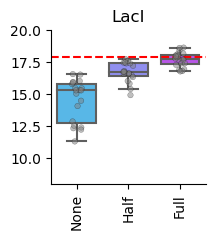

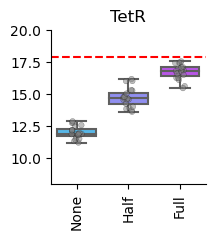

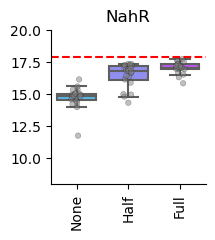

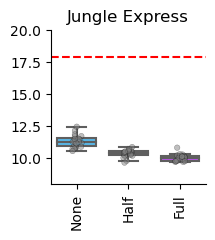

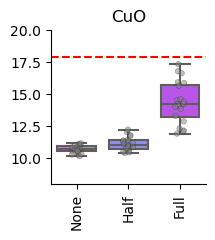

In [10]:
#plot the WT line
for strain in dfeind.Strain.unique():
    temp_df = dfeind[dfeind.Strain == strain]
    
    plt.figure(figsize=(2,2))
    sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette='cool',
            width=.75,showfliers=False)

    # Add in points to show each observation
    sns.stripplot(x="Complement", y="GFP_log", data=temp_df,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

    sns.despine(top=True, right=True)
    plt.legend(loc=(1,.7))
    plt.xticks(rotation=90)
    plt.axhline(y = np.log2(246477.70), color = 'r', linestyle = 'dashed')
    plt.ylim(8,20)
    plt.title(strain)
    plt.legend(loc=(1,.7),)
    plt.xlabel('')
    plt.ylabel('',fontsize=15)
    plt.xticks(rotation=90)
    plt.ylim(8,20)
    plt.legend([],[], frameon=False)
    plt.savefig('%s_agro_ind_fig1.png'% strain,kind='png',dpi=300,bbox_inches='tight')

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/2786076509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB1S",'LacI')
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/2786076509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB2S",'TetR')
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/2786076509.py:10: SettingWithCopyWarning: 
A value is trying to b

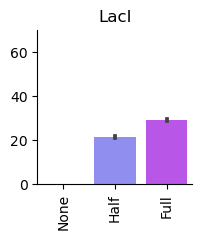

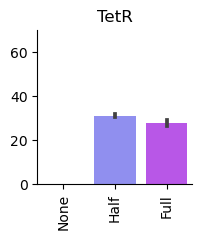

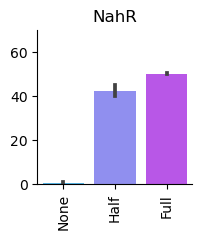

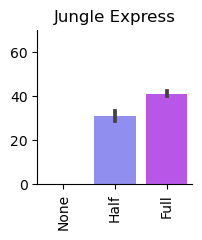

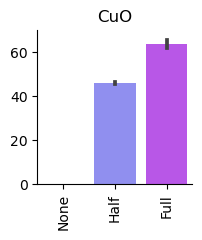

In [11]:
#virE inducible proteomics fig1
df_virE = pd.read_excel('virE_comp_vironly.xlsx',sheet_name='data_E')


dfind=df_virE[df_virE.Strain.isin(['ΔvirE12 pB1S',
       'ΔvirE12 pB2S', 'ΔvirE12 pB3S', 'ΔvirE12 pB5S', 'ΔvirE12 pB6S'])]

dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB1S",'LacI')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB2S",'TetR')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB3S",'NahR')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB5S",'Jungle Express')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB6S",'CuO')

dfind = dfind[dfind.Protein=='virE2']

for strain in dfind.Strain.unique():
    temp_df = dfind[dfind.Strain == strain]
    
    plt.figure(figsize=(2,2))
    sns.barplot(x="Induction", y="Count", data=temp_df,palette='cool')

    sns.despine(top=True, right=True)
    plt.legend(loc=(1,.7))
    plt.xticks(rotation=90)
    plt.title(strain)
    plt.legend(loc=(1,.7),)
    plt.xlabel('')
    plt.ylim(0,70)
    plt.ylabel('',fontsize=15)
    plt.xticks(rotation=90)
    plt.legend([],[], frameon=False)
    plt.savefig('%s_agro_indprot_fig1.png'% strain,kind='png',dpi=300,bbox_inches='tight')



In [12]:
#KO Data
dfko = pd.read_excel('2022.5.30 vir KO.xlsx',sheet_name='data')
dfko['GFP_log'] = dfko.GFP.apply(np.log2)
dfko = dfko.dropna()
dfko.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,577436,WT,1,Top,19.139302
1,A2,596205,WT,1,Top,19.185449
2,A3,446297,WT,1,Top,18.767645
3,A4,516985,WT,1,Top,18.979763
4,A5,313663,WT,1,Bottom,18.258856


In [13]:
dfkosum=rp.summary_cont(dfko['GFP'].groupby(dfko['Strain']))
dfkosum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
WT,64,408382.4375,140509.3847,17563.6731,373284.2375,443480.6375
ΔvirB1-5,64,855.4531,387.7543,48.4693,758.5950,952.3113
ΔvirB6-11,64,766.7500,79.2012,9.9001,746.9661,786.5339
ΔvirC12,64,22199.5312,6481.9588,810.2449,20580.3861,23818.6764
ΔvirD12,64,839.1719,115.9501,14.4938,810.2084,868.1354
ΔvirD3,64,397584.3906,162160.5840,20270.0730,357077.8820,438090.8993
ΔvirD4,64,728.2031,78.1098,9.7637,708.6919,747.7144
ΔvirD5,64,177349.1875,86375.7494,10796.9687,155773.1673,198925.2077
ΔvirE12,64,1940.8281,472.6355,59.0794,1822.7673,2058.8889


In [14]:
compko = mc.MultiComparison(dfko['GFP'], dfko['Strain'])
tblko, a1ko, a2ko = compko.allpairtest(stats.ttest_ind, method= "bonf")
print(tblko)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
  group1    group2    stat    pval  pval_corr reject
----------------------------------------------------
       WT  ΔvirB1-5  23.2027    0.0       0.0   True
       WT ΔvirB6-11  23.2079    0.0       0.0   True
       WT   ΔvirC12  21.9642    0.0       0.0   True
       WT   ΔvirD12  23.2038    0.0       0.0   True
       WT    ΔvirD3   0.4026 0.6879       1.0  False
       WT    ΔvirD4  23.2101    0.0       0.0   True
       WT    ΔvirD5   11.206    0.0       0.0   True
       WT   ΔvirE12  23.1409    0.0       0.0   True
       WT    ΔvirE3   4.5199    0.0    0.0013   True
       WT     ΔvirF  -0.1856 0.8531       1.0  False
       WT    ΔvirH1  11.2967    0.0       0.0   True
       WT    ΔvirH2   4.8709    0.0    0.0003   True
       WT     ΔvirK   3.8629 0.0002    0.0162   True
 ΔvirB1-5 ΔvirB6-11   1.7931 0.0754       1.0  False
 ΔvirB1-5   ΔvirC12 -26.2957    0.0       0.0   True
 ΔvirB

In [15]:
dfko.Strain.unique()

array(['WT', 'ΔvirB1-5', 'ΔvirB6-11', 'ΔvirC12', 'ΔvirD12', 'ΔvirD3',
       'ΔvirD4', 'ΔvirD5', 'ΔvirE12', 'ΔvirE3', 'ΔvirF', 'ΔvirH1',
       'ΔvirH2', 'ΔvirK'], dtype=object)

In [16]:
kosiglist=['WT','ΔvirD3', 'ΔvirF']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/1165621242.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('all_ko_coloredsig.png',kind='png',dpi=300,bbox_inches='tight')


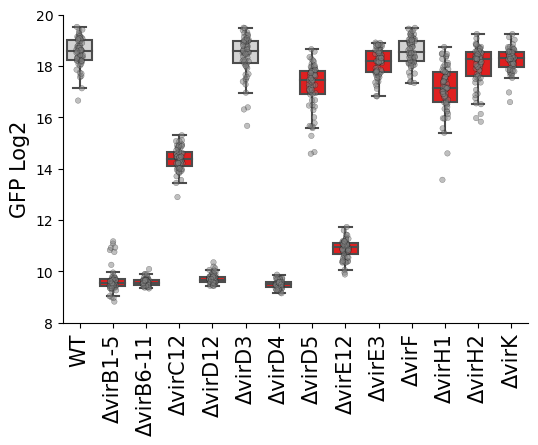

In [17]:
my_ko_pal = {Strain: "lightgrey" if Strain in kosiglist else "red" for Strain in dfko.Strain.unique()}


plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfko,palette=my_ko_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfko,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.savefig('all_ko_coloredsig.png',kind='png',dpi=300,bbox_inches='tight')



In [18]:
#complement with p117 data
df117comp = pd.read_excel('2022.8.8 con 117 tobacco.xlsx',sheet_name='data')
df117comp['GFP_log'] = df117comp.GFP.apply(np.log2)
df117comp = df117comp.dropna()
df117comp.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,442081,WT,1,Top,18.753951
1,A2,534247,WT,1,Top,19.027147
2,A3,369060,WT,1,Top,18.493496
3,A4,455186,WT,1,Top,18.796097
4,A5,68986,WT,1,Bottom,16.074016


In [19]:
df117compsum=rp.summary_cont(df117comp['GFP'].groupby(df117comp['Strain']))
df117compsum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
WT,64,319949.3438,144069.4570,18008.6821,283961.8642,355936.8233
ΔvirB1-5,64,40812.3906,21555.6609,2694.4576,35427.9468,46196.8345
ΔvirB6-11,64,36773.0781,16360.1633,2045.0204,32686.4309,40859.7253
ΔvirC12,64,288330.8750,121907.8681,15238.4835,257879.1956,318782.5544
ΔvirD12,64,330031.4375,119936.7848,14992.0981,300072.1201,359990.7549
ΔvirD3,64,252864.9062,125435.1148,15679.3893,221532.1468,284197.6657
ΔvirD4,64,144179.7031,64990.0988,8123.7623,127945.6595,160413.7468
ΔvirD5,64,239090.9062,94688.7955,11836.0994,215438.3489,262743.4636
ΔvirE12,64,249152.9844,128340.5626,16042.5703,217094.4657,281211.5030


In [20]:
comp117 = mc.MultiComparison(df117comp['GFP'], df117comp['Strain'])
tbl117, a1117, a2117 = comp117.allpairtest(stats.ttest_ind, method= "bonf")
print(tbl117)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
  group1    group2    stat    pval  pval_corr reject
----------------------------------------------------
       WT  ΔvirB1-5  15.3295    0.0       0.0   True
       WT ΔvirB6-11   15.624    0.0       0.0   True
       WT   ΔvirC12   1.3403 0.1826       1.0  False
       WT   ΔvirD12  -0.4303 0.6677       1.0  False
       WT    ΔvirD3   2.8095 0.0058    0.5237  False
       WT    ΔvirD4   8.8969    0.0       0.0   True
       WT    ΔvirD5   3.7521 0.0003    0.0242   True
       WT   ΔvirE12   2.9354  0.004    0.3604  False
       WT    ΔvirE3   0.3936 0.6945       1.0  False
       WT     ΔvirF   0.0684 0.9456       1.0  False
       WT    ΔvirH1  -0.1659 0.8685       1.0  False
       WT    ΔvirH2  -0.2798 0.7801       1.0  False
       WT     ΔvirK    9.779    0.0       0.0   True
 ΔvirB1-5 ΔvirB6-11   1.1941 0.2347       1.0  False
 ΔvirB1-5   ΔvirC12 -15.9949    0.0       0.0   True
 ΔvirB

In [21]:
ko117siglist=['WT', 'ΔvirC12', 'ΔvirD12', 'ΔvirD3', 'ΔvirE12', 'ΔvirE3', 'ΔvirF', 'ΔvirH1',
       'ΔvirH2']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/383726537.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('all_ko117comp_coloredsig.png',kind='png',dpi=300,bbox_inches='tight')


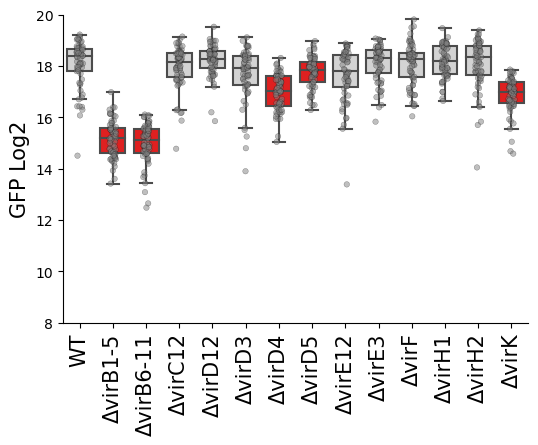

In [22]:
my_ko117_pal = {Strain: "lightgrey" if Strain in ko117siglist else "red" for Strain in dfko.Strain.unique()}


plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=df117comp,palette=my_ko117_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=df117comp,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.savefig('all_ko117comp_coloredsig.png',kind='png',dpi=300,bbox_inches='tight')



In [23]:
#complement with B1S data
df = pd.read_excel('2022.6.6 bis comps 1.xlsx',sheet_name='data')
df['GFP_log'] = df.GFP.apply(np.log2)
df['ID'] = df.Strain + "_" + df.Induction
df2 = pd.read_excel('2022.6.13 bis comps 2.xlsx',sheet_name='data')
df2 = df2[df2.Strain != "Empty"]
df2['GFP_log'] = df2.GFP.apply(np.log2)
df2['ID'] = df2.Strain + "_" + df2.Induction
dfB1S=pd.concat([df,df2])
dfB1S.replace(to_replace="2mM",
           value="2.0mM",inplace=True)
dfB1S.head()

,Well,GFP,Strain,Plant,Leaf,Induction,GFP_log,ID
0,A1,651387,WT,1,Top,0mM,19.313155,WT_0mM
1,A2,1121389,WT,1,Top,0mM,20.096855,WT_0mM
2,A3,688325,WT,1,Top,0mM,19.392730,WT_0mM
3,A4,673891,WT,1,Top,0mM,19.362156,WT_0mM
4,A5,294197,WT,1,Bottom,0mM,18.166423,WT_0mM


In [24]:
dfB1Ssum=rp.summary_cont(dfB1S['GFP'].groupby(dfB1S['ID']))
dfB1Ssum

,N,Mean,SD,SE,95% Conf.,Interval
ID,,,,,,
Leaf_0mM,32,664.9688,93.4215,16.5147,631.2867,698.6508
WT_0mM,80,420344.7875,167850.9269,18766.3041,382991.3935,457698.1815
WT_2mM,40,233999.2250,83942.3343,13272.4484,207153.1642,260845.2858
ΔvirB1-5_0.2mM,40,10229.5500,16077.4039,2542.0608,5087.7468,15371.3532
ΔvirB1-5_0mM,40,1946.8250,1878.9243,297.0840,1345.9159,2547.7341
ΔvirB1-5_2.0mM,40,116373.1250,51514.3533,8145.1344,99898.0356,132848.2144
ΔvirB6-11_0.2mM,40,42083.2750,17414.1909,2753.4253,36513.9466,47652.6034
ΔvirB6-11_0mM,40,9461.6250,6538.5740,1033.8393,7370.4876,11552.7624
ΔvirB6-11_2.0mM,40,15854.3500,10013.9870,1583.3504,12651.7216,19056.9784


In [25]:
dfB1S_plot = dfB1S[dfB1S.Strain.isin(['ΔvirB1-5', 'ΔvirB6-11', 'ΔvirC12', 'ΔvirD12', 'ΔvirE12',
       'ΔvirD3', 'ΔvirD4', 'ΔvirD5', 'ΔvirE3', 'ΔvirF', 'ΔvirH1',
       'ΔvirH2', 'ΔvirK'])]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ΔvirB1-5'),
  Text(1, 0, 'ΔvirB6-11'),
  Text(2, 0, 'ΔvirC12'),
  Text(3, 0, 'ΔvirD12'),
  Text(4, 0, 'ΔvirE12'),
  Text(5, 0, 'ΔvirD3'),
  Text(6, 0, 'ΔvirD4'),
  Text(7, 0, 'ΔvirD5'),
  Text(8, 0, 'ΔvirE3'),
  Text(9, 0, 'ΔvirF'),
  Text(10, 0, 'ΔvirH1'),
  Text(11, 0, 'ΔvirH2'),
  Text(12, 0, 'ΔvirK')])

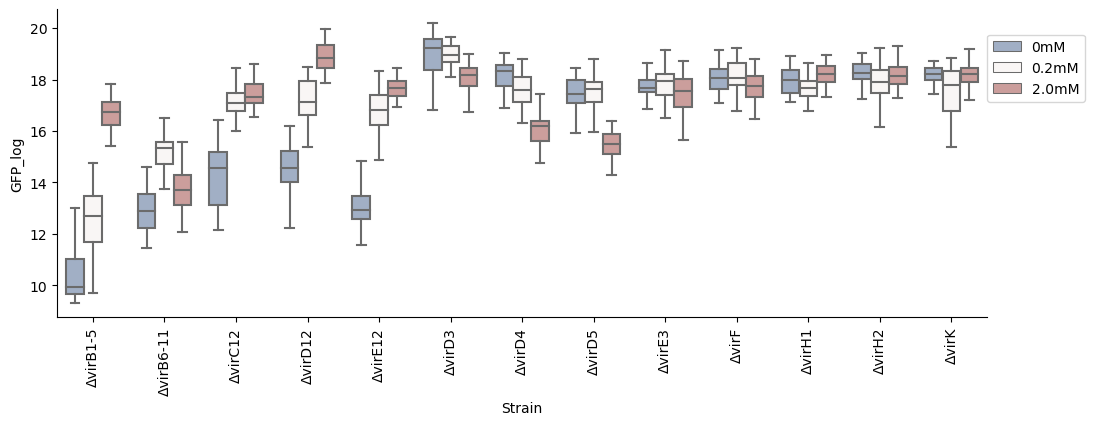

In [26]:

plt.figure(figsize=(12,4))
sns.boxplot(x="Strain", y="GFP_log",hue='Induction', data=dfB1S_plot,
            width=.75, palette="vlag",showfliers=False)



sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/4140425711.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('%s_agro_test.png'% strain,kind='png',dpi=300,bbox_inches='tight')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel

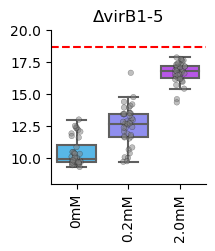

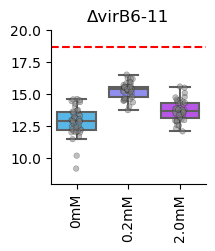

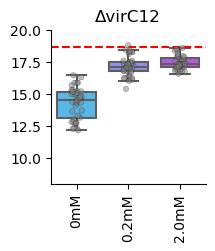

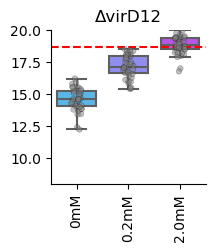

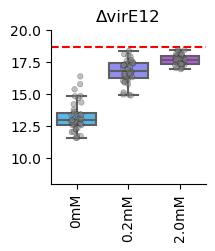

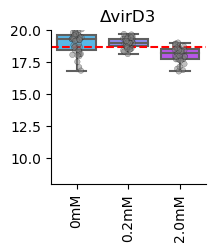

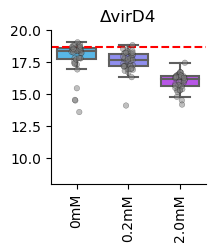

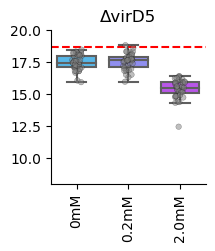

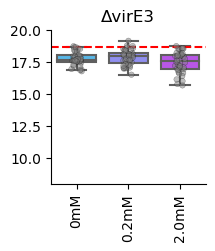

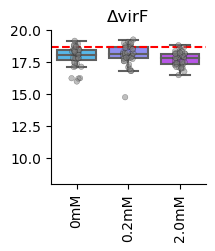

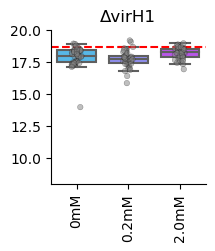

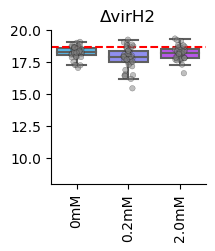

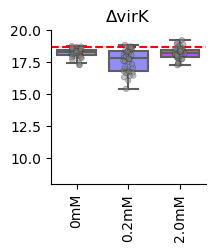

In [27]:
#plot the WT line
for strain in dfB1S_plot.Strain.unique():
    temp_df = dfB1S_plot[dfB1S_plot.Strain == strain]
    
    plt.figure(figsize=(2,2))
    sns.boxplot(x="Induction", y="GFP_log", data=temp_df,palette='cool',
            width=.75,showfliers=False)

    # Add in points to show each observation
    sns.stripplot(x="Induction", y="GFP_log", data=temp_df,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

    sns.despine(top=True, right=True)
    plt.legend(loc=(1,.7))
    plt.xticks(rotation=90)
    plt.axhline(y = np.log2(420344.7875), color = 'r', linestyle = 'dashed')
    plt.ylim(8,20)
    plt.title(strain)
    plt.legend(loc=(1,.7),)
    plt.xlabel('')
    plt.ylabel('',fontsize=15)
    plt.xticks(rotation=90)
    plt.ylim(8,20)
    plt.legend([],[], frameon=False)
    plt.savefig('%s_agro_test.png'% strain,kind='png',dpi=300,bbox_inches='tight')

In [28]:
#constitutive complement for figure 2

In [29]:
dfcomp2 = pd.read_excel('2022.9.19 con comp.xlsx',sheet_name='data')
dfcomp2['GFP_log'] = dfcomp2.GFP.apply(np.log2)
dfcomp2['ID'] = dfcomp2.Strain + "_" + dfcomp2.Promoter
dfcomp2.head()

,Well,GFP,Strain,Plant,Leaf,Promoter,GFP_log,ID
0,A1,253239,WT,1,Top,p117,17.950140,WT_p117
1,A2,198311,WT,1,Top,p117,17.597405,WT_p117
2,A3,235952,WT,1,Top,p117,17.848134,WT_p117
3,A4,208438,WT,1,Top,p117,17.669259,WT_p117
4,A5,370471,WT,1,Bottom,p117,18.499001,WT_p117


In [30]:
dfcomp2sum=rp.summary_cont(dfcomp2['GFP'].groupby(dfcomp2['ID']))
dfcomp2sum

,N,Mean,SD,SE,95% Conf.,Interval
ID,,,,,,
WT_p117,64,333645.8594,101861.5348,12732.6918,308201.6051,359090.1137
ΔvirB1-5_p100,64,77570.6562,45381.2753,5672.6594,66234.7510,88906.5615
ΔvirB1-5_p101,64,198356.6094,60290.7125,7536.3391,183296.4375,213416.7812
ΔvirB1-5_p117,64,59584.0000,21472.3125,2684.0391,54220.3759,64947.6241
ΔvirB6-11_p114,64,17539.5938,5178.4379,647.3047,16246.0585,18833.1290
ΔvirB6-11_p117,64,88400.8438,24379.5391,3047.4424,82311.0161,94490.6714
ΔvirC12_p100,64,167571.0000,62408.2050,7801.0256,151981.8942,183160.1058
ΔvirC12_p101,64,409004.6562,118255.5241,14781.9405,379465.3052,438544.0073
ΔvirC12_p111,64,121504.9062,54728.0065,6841.0008,107834.2570,135175.5555


In [31]:
198356.6094/333645.8594

0.5945124263094631

In [32]:
(785375.5469-333645.8594)/333645.8594

1.3539196569450966

In [33]:
(575396.7656-333645.8594)/333645.8594

0.7245733743998622

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/6876609.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('%s_agro_comp2.png'% strain,kind='png',dpi=300,bbox_inches='tight')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_7

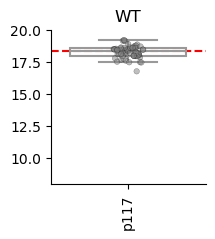

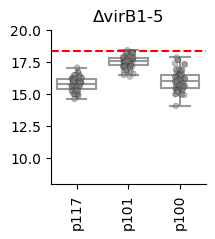

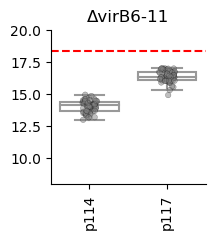

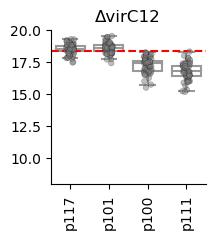

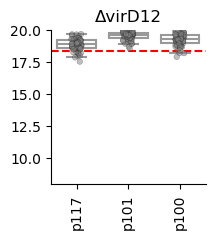

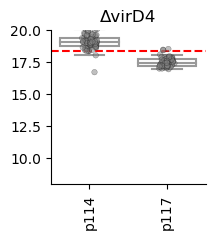

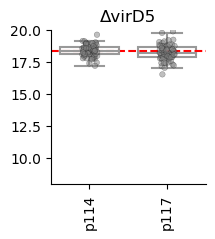

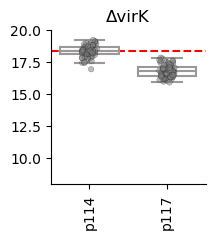

In [34]:
for strain in dfcomp2.Strain.unique():
    temp_df = dfcomp2[dfcomp2.Strain == strain]
    
    plt.figure(figsize=(2,2))
    sns.boxplot(x="Promoter", y="GFP_log", data=temp_df,
            width=.75,showfliers=False,color="white")

    # Add in points to show each observation
    sns.stripplot(x="Promoter", y="GFP_log", data=temp_df,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

    sns.despine(top=True, right=True)
    plt.legend(loc=(1,.7))
    plt.xticks(rotation=90)
    plt.ylim(8,20)
    plt.title(strain)
    plt.axhline(y = np.log2(333645.8594), color = 'r', linestyle = 'dashed')    
    plt.legend(loc=(1,.7),)
    plt.xlabel('')
    plt.ylabel('',fontsize=15)
    plt.xticks(rotation=90)
    plt.ylim(8,20)
    plt.legend([],[], frameon=False)
    plt.savefig('%s_agro_comp2.png'% strain,kind='png',dpi=300,bbox_inches='tight')

In [35]:
#virC12 alleles

In [36]:
dfvirc = pd.read_excel('2022.9.5 virC12 alleles.xlsx',sheet_name='data')
dfvirc['GFP_log'] = dfvirc.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvirc.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,590484,WT,1,Top,19.171538
1,A2,507461,WT,1,Top,18.952937
2,A3,632063,WT,1,Top,19.269709
3,A4,412717,WT,1,Top,18.654793
4,A5,237246,WT,1,Bottom,17.856024


In [37]:
dfvircsum=rp.summary_cont(dfvirc['GFP'].groupby(dfvirc['Strain']))
dfvircsum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,64,325470.0625,96475.7522,12059.4690,301371.1366,349568.9884
Ach5,64,14643.5156,4176.4645,522.0581,13600.2658,15686.7654
B21,64,397758.2656,120049.7345,15006.2168,367770.7342,427745.7971
C58,64,394025.2500,87054.8919,10881.8615,372279.5850,415770.9150
Leaf,12,720.7500,76.9322,22.2084,671.8696,769.6304
NCIB,64,369331.3750,102801.3304,12850.1663,343652.3667,395010.3833
Q15,64,432437.9688,98782.5051,12347.8131,407762.8332,457113.1043
S4,64,755133.0625,133805.9631,16725.7454,721709.3274,788556.7976
T60,64,178679.7500,58314.7131,7289.3391,164113.1681,193246.3319


In [38]:
(755133.0625-394025.2500)/394025.2500

0.9164585581761575

In [39]:
compvirc = mc.MultiComparison(dfvirc['GFP'], dfvirc['Strain'])
tblvirc, a1virc, a2virc = compvirc.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvirc)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
    A4   Ach5  25.7504    0.0       0.0   True
    A4    B21   -3.755 0.0003    0.0206   True
    A4    C58  -4.2205    0.0    0.0036   True
    A4   Leaf  11.5971    0.0       0.0   True
    A4   NCIB  -2.4889 0.0141       1.0  False
    A4    Q15  -6.1975    0.0       0.0   True
    A4     S4 -20.8373    0.0       0.0   True
    A4    T60  10.4171    0.0       0.0   True
    A4   TiAB  26.4611    0.0       0.0   True
    A4   TiBo  -5.3087    0.0       0.0   True
    A4     WT  -2.6306 0.0096    0.7478  False
    A4    pRi   25.777    0.0       0.0   True
  Ach5    B21  -25.515    0.0       0.0   True
  Ach5    C58 -34.8236    0.0       0.0   True
  Ach5   Leaf  11.4848    0.0       0.0   True
  Ach5   NCIB -27.5791    0.0       0.0   True
  Ach5    Q15 -33.8053    0.0       0.0   True
  Ach5     S4 

In [40]:
dfvirc.Strain.unique()

array(['WT', 'A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4',
       'T60', 'TiAB', 'TiBo', 'Leaf'], dtype=object)

In [41]:
dfvircplot = dfvirc[dfvirc.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4',
       'T60', 'TiAB', 'TiBo'])]

In [42]:
my_virC_pal = {'A4': 'red',
 'Ach5': 'red',
 'B21': 'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'Q15': 'lightgrey',
 'pRi': 'red',
 'S4': 'yellow',
 'T60': 'red',
 'TiAB': 'red',
 'TiBo': 'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/2253405231.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virCallele.png',kind='png',dpi=300,bbox_inches='tight')


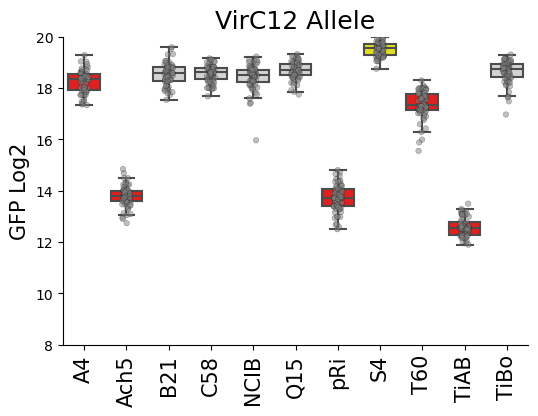

In [43]:


plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfvircplot,palette=my_virC_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfvircplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirC12 Allele',size=18)
plt.savefig('2022.9.23_virCallele.png',kind='png',dpi=300,bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/1754540124.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virCallelenolog.png',kind='png',dpi=300,bbox_inches='tight')


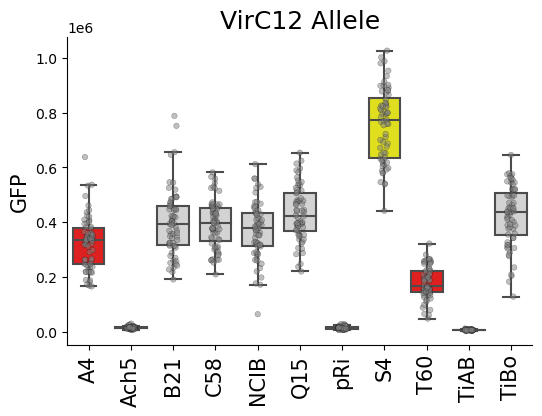

In [44]:


plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvircplot,palette=my_virC_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvircplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirC12 Allele',size=18)
plt.savefig('2022.9.23_virCallelenolog.png',kind='png',dpi=300,bbox_inches='tight')

In [45]:
#virD12 alleles

In [46]:
dfvird = pd.read_excel('2022.7.25 virD allele.xlsx',sheet_name='data')
dfvird['GFP_log'] = dfvird.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvird.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,185108,WT,1,Top,17.498008
1,A2,254153,WT,1,Top,17.955338
2,A3,196532,WT,1,Top,17.584405
3,A4,241462,WT,1,Top,17.881437
4,A5,221387,WT,1,Bottom,17.756211


In [47]:
dfvirdsum=rp.summary_cont(dfvird['GFP'].groupby(dfvird['Strain']))
dfvirdsum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,64,237280.9062,114711.8730,14338.9841,208626.7330,265935.0795
Ach5,64,83258.1719,35920.7250,4490.0906,74285.4417,92230.9020
B21,64,813.8750,106.0294,13.2537,787.3896,840.3604
C58,64,298870.7031,107009.5529,13376.1941,272140.5121,325600.8941
Leaf,16,554.1875,57.0616,14.2654,523.7815,584.5935
NCIB,64,109171.9688,36871.1026,4608.8878,99961.8413,118382.0962
Q15,64,5551.0156,1995.9585,249.4948,5052.4400,6049.5912
S4,64,87973.4844,46358.6339,5794.8292,76393.4422,99553.5266
T60,65,210729.1077,120268.8414,14917.5138,180927.9480,240530.2674


In [48]:
compvird = mc.MultiComparison(dfvird['GFP'], dfvird['Strain'])
tblvird, a1vird, a2vird = compvird.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvird)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1  group2   stat    pval  pval_corr reject
-----------------------------------------------
    A4    Ach5  10.2507    0.0       0.0   True
    A4     B21  16.4912    0.0       0.0   True
    A4     C58  -3.1408 0.0021    0.1911  False
    A4    Leaf   8.2153    0.0       0.0   True
    A4    NCIB   8.5057    0.0       0.0   True
    A4     Q15  16.1584    0.0       0.0   True
    A4      S4   9.6541    0.0       0.0   True
    A4     T60   1.2827 0.2019       1.0  False
    A4    TiAB  16.4912    0.0       0.0   True
    A4    TiBo  -3.2127 0.0017    0.1522  False
    A4      WT  -1.7132 0.0891       1.0  False
    A4     pRi   7.9215    0.0       0.0   True
    A4 ΔvirD12   16.492    0.0       0.0   True
  Ach5     B21  18.3613    0.0       0.0   True
  Ach5     C58 -15.2812    0.0       0.0   True
  Ach5    Leaf   9.1656    0.0       0.0   True
  Ach5    NCIB  -4.0273 0.0001    0.0088   

In [49]:
dfvirdplot = dfvird[dfvird.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4',
       'T60', 'TiAB', 'TiBo'])]

In [50]:
my_virD_pal = {'A4': 'lightgrey',
 'Ach5': 'red',
 'B21': 'red',
 'C58': 'lightgrey',
 'NCIB': 'red',
 'Q15': 'red',
 'pRi': 'red',
 'S4': 'red',
 'T60': 'red',
 'TiAB': 'red',
 'TiBo': 'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/158391725.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virDallele.png',kind='png',dpi=300,bbox_inches='tight')


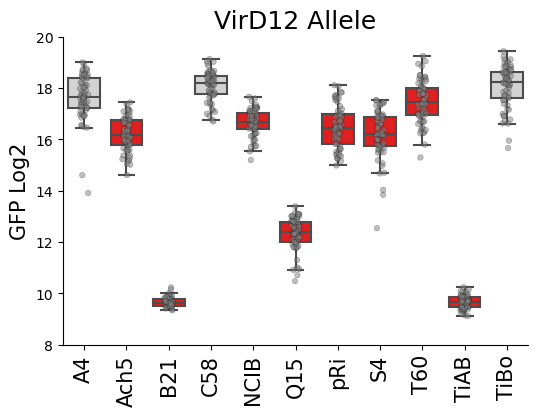

In [51]:


plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfvirdplot,palette=my_virD_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfvirdplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD12 Allele',size=18)
plt.savefig('2022.9.23_virDallele.png',kind='png',dpi=300,bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/1637719708.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virD12allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')


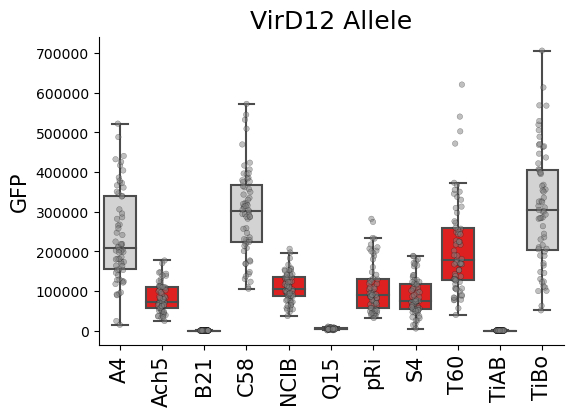

In [52]:


plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirdplot,palette=my_virD_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirdplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD12 Allele',size=18)
plt.savefig('2022.9.23_virD12allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

In [53]:
dfvire = pd.read_excel('2022.9.12 virE12 allele.xlsx',sheet_name='data')
dfvire['GFP_log'] = dfvire.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvire.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,420499,WT,1,Top,18.681743
1,A2,440842,WT,1,Top,18.749902
2,A3,353656,WT,1,Top,18.431987
3,A4,335207,WT,1,Top,18.354693
4,A5,269325,WT,1,Bottom,18.038989


In [54]:
dfviresum=rp.summary_cont(dfvire['GFP'].groupby(dfvire['Strain']))
dfviresum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
Ach5,64,2846.3906,1957.3493,244.6687,2357.4593,3335.3219
B21,64,2756.3594,511.5723,63.9465,2628.5724,2884.1463
C58,64,406786.8281,101312.1904,12664.0238,381479.7959,432093.8603
Leaf,12,759.6667,38.0964,10.9975,735.4614,783.8719
NCIB,64,410386.7812,154383.0933,19297.8867,371823.0320,448950.5305
Q15,64,179662.5312,58943.7547,7367.9693,164938.8194,194386.2431
S4,64,89230.2656,29799.3811,3724.9226,81786.6017,96673.9295
T60,64,250508.5156,79810.0608,9976.2576,230572.5556,270444.4756
TiAB,64,2968.7500,474.7727,59.3466,2850.1553,3087.3447


In [55]:
compvire = mc.MultiComparison(dfvire['GFP'], dfvire['Strain'])
tblvire, a1vire, a2vire = compvire.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvire)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
  Ach5    B21    0.356 0.7224       1.0  False
  Ach5    C58 -31.8907    0.0       0.0   True
  Ach5   Leaf   3.6728 0.0005    0.0248   True
  Ach5   NCIB -21.1167    0.0       0.0   True
  Ach5    Q15 -23.9847    0.0       0.0   True
  Ach5     S4 -23.1409    0.0       0.0   True
  Ach5    T60 -24.8177    0.0       0.0   True
  Ach5   TiAB   -0.486 0.6278       1.0  False
  Ach5   TiBo -18.9777    0.0       0.0   True
  Ach5     WT -26.3941    0.0       0.0   True
   B21    C58 -31.9034    0.0       0.0   True
   B21   Leaf  13.4404    0.0       0.0   True
   B21   NCIB -21.1229    0.0       0.0   True
   B21    Q15 -24.0093    0.0       0.0   True
   B21     S4 -23.2115    0.0       0.0   True
   B21    T60 -24.8337    0.0       0.0   True
   B21   TiAB  -2.4345 0.0163    0.8972  False
   B21   TiBo 

In [56]:
dfvireplot = dfvire[dfvire.Strain.isin(['Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4',
       'T60', 'TiAB', 'TiBo'])]

In [57]:
my_virE_pal = {
 'Ach5': 'red',
 'B21': 'red',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'Q15': 'red',
 'S4': 'red',
 'T60': 'red',
 'TiAB': 'red',
 'TiBo': 'red'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/243426097.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virEallele.png',kind='png',dpi=300,bbox_inches='tight')


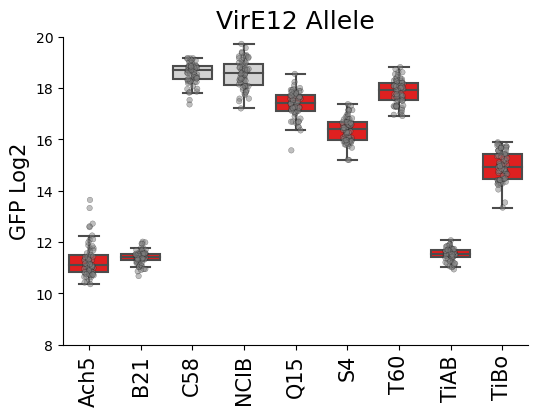

In [58]:


plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfvireplot,palette=my_virE_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfvireplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirE12 Allele',size=18)
plt.savefig('2022.9.23_virEallele.png',kind='png',dpi=300,bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/1521222547.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virE12allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')


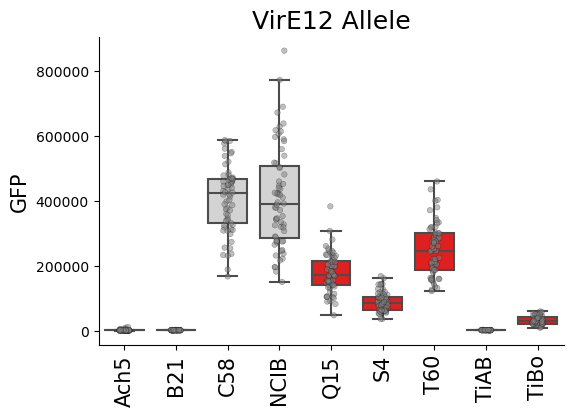

In [59]:


plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvireplot,palette=my_virE_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvireplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirE12 Allele',size=18)
plt.savefig('2022.9.23_virE12allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

In [60]:
dfvird4 = pd.read_excel('2022.10.17 vird4 allle.xlsx',sheet_name='data')
dfvird4['GFP_log'] = dfvird4.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvird4.head()

,Well,GFP,Strain,Plant,Leaf,Reader,GFP_log
0,A1,462563,WT,1,Top,SB3,18.819290
1,A2,438281,WT,1,Top,SB3,18.741497
2,A3,392044,WT,1,Top,SB3,18.580656
3,A4,536579,WT,1,Top,SB3,19.033431
4,A5,556292,WT,1,Bottom,SB3,19.085483


In [61]:
dfvird4sum=rp.summary_cont(dfvird4['GFP'].groupby(dfvird4['Strain']))
dfvird4sum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,128,452110.3438,125243.6398,11070.0784,430204.6564,474016.0311
Ach5,128,501141.0234,212957.1352,18822.9293,463893.8432,538388.2036
B21,128,618720.3281,206001.0933,18208.0963,582689.7916,654750.8647
C58,128,698560.7500,209110.8958,18482.9666,661986.2947,735135.2053
Leaf,48,857.5208,186.2205,26.8786,803.4480,911.5936
NCIB,128,1016.6172,259.3750,22.9257,971.2513,1061.9831
Q15,128,741982.3281,188564.7906,16666.9303,709001.4809,774963.1753
S4,128,559049.5547,167735.0372,14825.8228,529711.9269,588387.1824
T60,128,761150.0156,276321.2190,24423.5760,712820.1664,809479.8649


In [62]:
(792410.6875-698560.7500)/698560.7500

0.13434756748070945

In [63]:
compvird4 = mc.MultiComparison(dfvird4['GFP'], dfvird4['Strain'])
tblvird4, a1vird4, a2vird4 = compvird4.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvird4)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
    A4   Ach5  -2.2453 0.0256       1.0  False
    A4    B21  -7.8187    0.0       0.0   True
    A4    C58 -11.4391    0.0       0.0   True
    A4   Leaf  24.9176    0.0       0.0   True
    A4   NCIB  40.7488    0.0       0.0   True
    A4    Q15 -14.4876    0.0       0.0   True
    A4     S4  -5.7796    0.0       0.0   True
    A4    T60 -11.5248    0.0       0.0   True
    A4   TiAB  -4.6166    0.0    0.0004   True
    A4   TiBo  -17.336    0.0       0.0   True
    A4     WT  -5.3861    0.0       0.0   True
  Ach5    B21  -4.4897    0.0    0.0007   True
  Ach5    C58  -7.4836    0.0       0.0   True
  Ach5   Leaf  16.2467    0.0       0.0   True
  Ach5   NCIB  26.5699    0.0       0.0   True
  Ach5    Q15  -9.5795    0.0       0.0   True
  Ach5     S4  -2.4168 0.0164       1.0  False
  Ach5    T60 

In [64]:
dfvird4plot = dfvird4[dfvird4.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4',
       'T60', 'TiAB', 'TiBo'])]

In [65]:
my_vird4_pal = {'A4':'red',
 'Ach5': 'red',
 'B21': 'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'red',
 'Q15': 'lightgrey',
 'S4': 'red',
 'T60': 'lightgrey',
 'TiAB': 'red',
 'TiBo': 'yellow'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirD4 Allele')

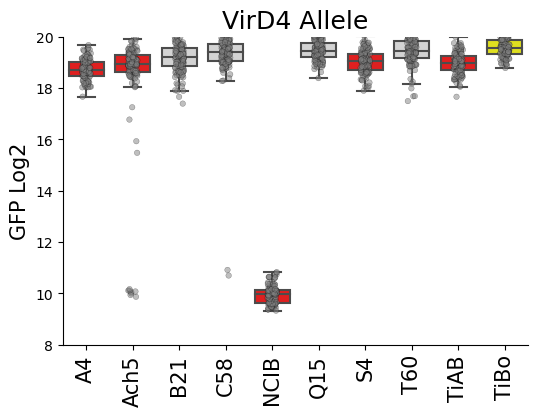

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfvird4plot,palette=my_vird4_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfvird4plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD4 Allele',size=18)
#plt.savefig('2022.9.23_virD4allele.png',kind='png',dpi=300,bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/2957998297.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virD4allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')


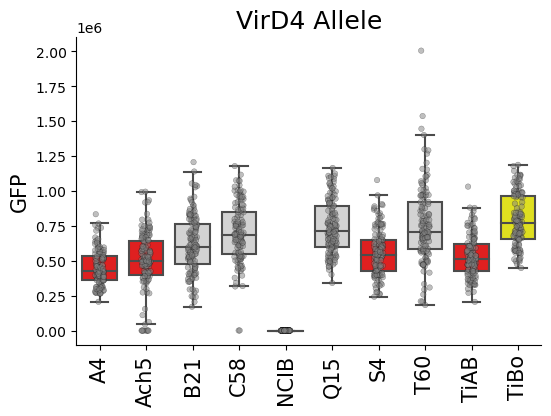

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvird4plot,palette=my_vird4_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvird4plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD4 Allele',size=18)
plt.savefig('2022.9.23_virD4allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

In [68]:
#virD5
dfvird5 = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virD5_data')
dfvird5['GFP_log'] = dfvird5.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvird5.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,298538,WT,1,Top,18.187555
1,A2,298225,WT,1,Top,18.186042
2,A3,467425,WT,1,Top,18.834375
3,A4,288799,WT,1,Top,18.139706
4,A5,495752,WT,1,Bottom,18.919259


In [69]:
dfvird5sum=rp.summary_cont(dfvird5['GFP'].groupby(dfvird5['Strain']))
dfvird5sum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,64,369613.7031,100616.8488,12577.1061,344480.3621,394747.0442
B21,64,279817.2500,87134.1518,10891.7690,258051.7865,301582.7135
C58,64,284050.1562,99861.6327,12482.7041,259105.4626,308994.8499
NCIB,64,362774.8906,97086.7151,12135.8394,338523.3508,387026.4305
Q15,64,195883.1562,70842.9055,8855.3632,178187.1250,213579.1875
S4,64,274702.4844,120844.0424,15105.5053,244516.5407,304888.4280
T60,64,277007.8594,60293.1849,7536.6481,261947.0699,292068.6488
TiAB,64,367803.4531,117264.5116,14658.0639,338511.6497,397095.2566
TiBo,64,382223.1719,121320.0939,15165.0117,351918.3141,412528.0297


In [70]:
(369613.7031-284050.1562)/284050.1562

0.30122689613926695

In [71]:
compvird5 = mc.MultiComparison(dfvird5['GFP'], dfvird5['Strain'])
tblvird5, a1vird5, a2vird5 = compvird5.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvird5)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
    A4    B21   5.3972    0.0       0.0   True
    A4    C58   4.8286    0.0    0.0002   True
    A4   NCIB   0.3913 0.6962       1.0  False
    A4    Q15  11.2945    0.0       0.0   True
    A4     S4   4.8286    0.0    0.0002   True
    A4    T60   6.3159    0.0       0.0   True
    A4   TiAB   0.0937 0.9255       1.0  False
    A4   TiBo    -0.64 0.5233       1.0  False
    A4     WT   4.5395    0.0    0.0007   True
    A4    pRi   6.7518    0.0       0.0   True
   B21    C58  -0.2555 0.7987       1.0  False
   B21   NCIB  -5.0873    0.0    0.0001   True
   B21    Q15   5.9793    0.0       0.0   True
   B21     S4   0.2747  0.784       1.0  False
   B21    T60   0.2121 0.8324       1.0  False
   B21   TiAB  -4.8181    0.0    0.0002   True
   B21   TiBo  -5.4847    0.0       0.0   True
   B21     WT 

In [72]:
dfvird5plot = dfvird5[dfvird5.Strain.isin(['A4', 'B21', 'C58', 'NCIB', 'Q15', 'S4','pRi',
       'T60', 'TiAB', 'TiBo'])]

In [73]:
my_vird5_pal = {'A4':'yellow',
 'B21': 'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'yellow',
 'Q15': 'red',
 'S4': 'lightgrey',
 'T60': 'lightgrey',
 'TiAB': 'yellow',
 'TiBo': 'yellow','pRi':'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/3809125240.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virD5allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')


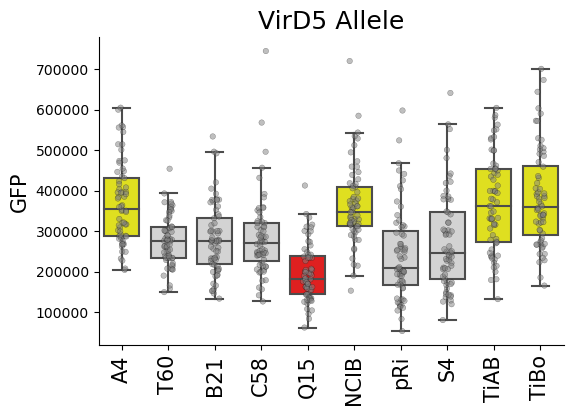

In [74]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvird5plot,palette=my_vird5_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvird5plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD5 Allele',size=18)
plt.savefig('2022.9.23_virD5allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

In [75]:
#virE3
dfvire3 = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virE3_data')
dfvire3['GFP_log'] = dfvire3.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvire3.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,298538,WT,1,Top,18.187555
1,A2,298225,WT,1,Top,18.186042
2,A3,467425,WT,1,Top,18.834375
3,A4,288799,WT,1,Top,18.139706
4,A5,495752,WT,1,Bottom,18.919259


In [76]:
dfvire3sum=rp.summary_cont(dfvire3['GFP'].groupby(dfvire3['Strain']))
dfvire3sum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,64,366749.4219,114625.4098,14328.1762,338116.8464,395381.9973
Ach5,64,409011.3594,106298.2596,13287.2825,382458.8442,435563.8746
B21,64,599222.6094,188450.6705,23556.3338,552149.0325,646296.1862
C58,64,429699.6719,84458.5248,10557.3156,408602.5601,450796.7836
NCIB,64,493116.9844,120443.9777,15055.4972,463030.9739,523202.9948
Q15,64,420545.6562,108740.4185,13592.5523,393383.1079,447708.2046
S4,64,671030.7812,175899.8871,21987.4859,627092.2968,714969.2657
T60,64,760480.4844,270356.0292,33794.5036,692947.5576,828013.4111
TiAB,64,661702.6562,139364.7361,17420.5920,626890.3810,696514.9315


In [77]:
(760480.4844-429699.6719)/429699.6719

0.7697953573885424

In [78]:
compvire3 = mc.MultiComparison(dfvire3['GFP'], dfvire3['Strain'])
tblvire3, a1vire3, a2vire3 = compvire3.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvire3)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
    A4   Ach5  -2.1627 0.0324       1.0  False
    A4    B21  -8.4316    0.0       0.0   True
    A4    C58   -3.537 0.0006    0.0312   True
    A4   NCIB  -6.0801    0.0       0.0   True
    A4    Q15  -2.7239 0.0074    0.4053  False
    A4     S4 -11.5943    0.0       0.0   True
    A4    T60 -10.7265    0.0       0.0   True
    A4   TiAB -13.0765    0.0       0.0   True
    A4   TiBo  -2.3293 0.0214       1.0  False
    A4     WT   4.0304 0.0001    0.0053   True
  Ach5    B21   -7.033    0.0       0.0   True
  Ach5    C58  -1.2191 0.2251       1.0  False
  Ach5   NCIB  -4.1885 0.0001    0.0029   True
  Ach5    Q15  -0.6068 0.5451       1.0  False
  Ach5     S4 -10.1991    0.0       0.0   True
  Ach5    T60  -9.6789    0.0       0.0   True
  Ach5   TiAB -11.5334    0.0       0.0   True
  Ach5   TiBo 

In [79]:
dfvire3plot = dfvire3[dfvire3.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4',
       'T60', 'TiAB', 'TiBo'])]

In [80]:
my_vire3_pal = {'A4':'red',
 'B21': 'yellow',
 'C58': 'lightgrey',
 'NCIB': 'yellow',
 'Q15': 'lightgrey',
 'S4': 'yellow',
 'T60': 'yellow',
 'TiAB': 'yellow',
 'TiBo': 'lightgrey','Ach5':'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/4004821896.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virE3allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')


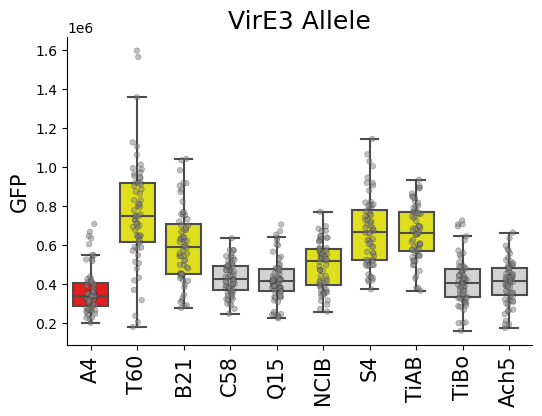

In [81]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvire3plot,palette=my_vire3_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvire3plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirE3 Allele',size=18)
plt.savefig('2022.9.23_virE3allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

In [82]:
#virF
dfvirF = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataF')
dfvirF['GFP_log'] = dfvirF.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvirF.head()

,Well,GFP_non,GFP,Strain,Plant,Leaf,GFP_log
0,A1,907747,659699.854651,WT,1,Top,19.331450
1,A2,579450,421111.918605,WT,1,Top,18.683844
2,A3,741414,538818.313953,WT,1,Top,19.039439
3,A4,913911,664179.505814,WT,1,Top,19.341214
4,A5,757615,550592.296512,WT,1,Bottom,19.070625


In [83]:
dfvirFsum=rp.summary_cont(dfvirF['GFP'].groupby(dfvirF['Strain']))
dfvirFsum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,64,515038.1995,157351.7288,19668.9661,475732.9071,554343.4919
B21,64,507455.5664,141279.2581,17659.9073,472165.0577,542746.0751
C58,64,564255.5074,136080.2101,17010.0263,530263.6823,598247.3325
NCIB,64,529174.4640,198965.9033,24870.7379,479474.2601,578874.6679
WT,64,464704.6920,145766.2982,18220.7873,428293.3541,501116.0300
pRi,64,541045.8644,117983.2742,14747.9093,511574.5194,570517.2094


In [84]:
compvirF = mc.MultiComparison(dfvirF['GFP'], dfvirF['Strain'])
tblvirF, a1virF, a2virF = compvirF.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvirF)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.003
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A4    B21  0.2869 0.7747       1.0  False
    A4    C58 -1.8927 0.0607    0.9104  False
    A4   NCIB -0.4458 0.6565       1.0  False
    A4     WT  1.8773 0.0628    0.9418  False
    A4    pRi -1.0579 0.2921       1.0  False
   B21    C58 -2.3165 0.0221    0.3322  False
   B21   NCIB  -0.712 0.4778       1.0  False
   B21     WT  1.6848 0.0945       1.0  False
   B21    pRi -1.4599 0.1468       1.0  False
   C58   NCIB  1.1643 0.2465       1.0  False
   C58     WT  3.9937 0.0001    0.0016   True
   C58    pRi  1.0309 0.3045       1.0  False
  NCIB     WT  2.0911 0.0385     0.578  False
  NCIB    pRi -0.4106 0.6821       1.0  False
    WT    pRi -3.2567 0.0014    0.0217   True
---------------------------------------------


In [85]:
dfvirFplot = dfvirF[dfvirF.Strain.isin(['A4', 'B21', 'C58', 'NCIB', ])]

In [86]:
my_virF_pal = {'A4':'lightgrey',
 'B21': 'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/2303912696.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virFallele_nolog.png',kind='png',dpi=300,bbox_inches='tight')


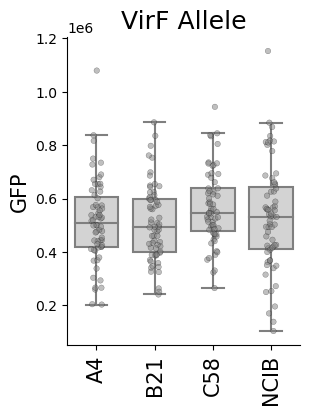

In [87]:
plt.figure(figsize=(3,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirFplot,palette=my_virF_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirFplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirF Allele',size=18)
plt.savefig('2022.9.23_virFallele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

In [88]:
#virH1
dfvirH1 = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataH1')
dfvirH1['GFP_log'] = dfvirH1.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvirH1.head()

,Well,GFP_non,GFP,Strain,Plant,Leaf,GFP_log
0,A1,907747,659699.854651,WT,1,Top,19.331450
1,A2,579450,421111.918605,WT,1,Top,18.683844
2,A3,741414,538818.313953,WT,1,Top,19.039439
3,A4,913911,664179.505814,WT,1,Top,19.341214
4,A5,757615,550592.296512,WT,1,Bottom,19.070625


In [89]:
dfvirH1sum=rp.summary_cont(dfvirH1['GFP'].groupby(dfvirH1['Strain']))
dfvirH1sum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,64,524457.7012,139744.9280,17468.1160,489550.4568,559364.9456
Ach5,64,586203.6928,189757.9389,23719.7424,538803.5700,633603.8156
C58,64,520662.6885,135480.3030,16935.0379,486820.7157,554504.6613
NCIB,64,494499.7275,132318.8750,16539.8594,461447.4559,527551.9990
Q15,64,518032.9079,128089.2814,16011.1602,486037.1574,550028.6584
S4,64,290101.9599,84264.9329,10533.1166,269053.2060,311150.7139
T60,64,438883.2099,91810.5758,11476.3220,415949.6105,461816.8094
TiBo,64,378142.7144,95745.7820,11968.2228,354226.1297,402059.2991
WT,64,464704.6920,145766.2982,18220.7873,428293.3541,501116.0300


In [90]:
compvirH1 = mc.MultiComparison(dfvirH1['GFP'], dfvirH1['Strain'])
tblvirH1, a1virH1, a2virH1 = compvirH1.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvirH1)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A4   Ach5 -2.0961 0.0381       1.0  False
    A4    C58   0.156 0.8763       1.0  False
    A4   NCIB  1.2453 0.2153       1.0  False
    A4    Q15  0.2711 0.7867       1.0  False
    A4     S4 11.4891    0.0       0.0   True
    A4    T60  4.0943 0.0001    0.0034   True
    A4   TiBo  6.9099    0.0       0.0   True
    A4     WT  2.3673 0.0194    0.8749  False
    A4    pRi  5.9445    0.0       0.0   True
  Ach5    C58  2.2488 0.0263       1.0  False
  Ach5   NCIB  3.1713 0.0019    0.0858  False
  Ach5    Q15  2.3821 0.0187    0.8419  False
  Ach5     S4  11.409    0.0       0.0   True
  Ach5    T60  5.5909    0.0       0.0   True
  Ach5   TiBo  7.8312    0.0       0.0   True
  Ach5     WT  4.0621 0.0001    0.0038   True
  Ach5    pRi  7.0755    0.0       0.0   True
   C58   NCIB  1.1052 0.2712     

In [91]:
dfvirH1plot = dfvirH1[dfvirH1.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'S4','pRi',
       'T60', 'TiBo'])]

In [92]:
my_virH1_pal = {'A4':'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'Q15': 'lightgrey',
 'S4': 'red',
 'T60': 'red','pRi': 'red',
 'TiBo': 'red','Ach5':'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_72977/4061488425.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2022.9.23_virH1allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')


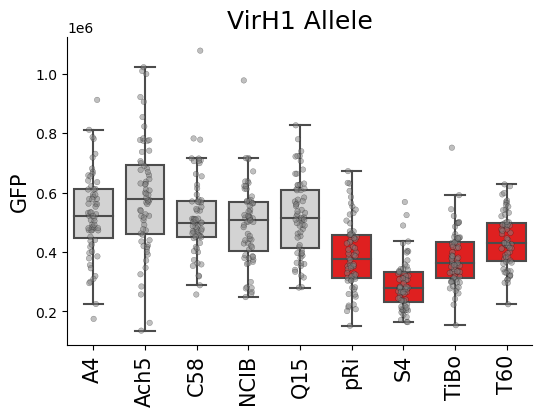

In [93]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirH1plot,palette=my_virH1_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirH1plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirH1 Allele',size=18)
plt.savefig('2022.9.23_virH1allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

In [95]:
#virH2
dfvirH2 = pd.read_excel('2023.1.9 virH2 allele virH12 comp.xlsx',sheet_name='data')
dfvirH2['GFP_log'] = dfvirH2.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvirH2 = dfvirH2[dfvirH2.Strain.isin(['WT','A4', 'Ach5', 'C58', 'NCIB', 'TiBo'])]
dfvirH2.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,826113,WT,1,Top,19.655980
1,A2,920009,WT,1,Top,19.811288
2,A3,789181,WT,1,Top,19.589997
3,A4,660249,WT,1,Top,19.332651
4,A5,754230,WT,1,Bottom,19.524645


In [96]:
dfvirH2sum=rp.summary_cont(dfvirH2['GFP'].groupby(dfvirH2['Strain']))
dfvirH2sum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,64,680295.1719,178381.9011,22297.7376,635736.6988,724853.6450
Ach5,64,628521.2188,237940.8351,29742.6044,569085.3666,687957.0709
C58,64,659236.9062,189529.5645,23691.1956,611893.8297,706579.9828
NCIB,64,610826.2969,154285.2996,19285.6625,572286.9757,649365.6180
TiBo,64,744488.9375,186380.6728,23297.5841,697932.4307,791045.4443
WT,64,696103.6094,145602.8829,18200.3604,659733.0914,732474.1274


In [97]:
compvirH2 = mc.MultiComparison(dfvirH2['GFP'], dfvirH2['Strain'])
tblvirH2, a1virH2, a2virH2 = compvirH2.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvirH2)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.003
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A4   Ach5  1.3928 0.1661       1.0  False
    A4    C58  0.6473 0.5186       1.0  False
    A4   NCIB  2.3564   0.02    0.2999  False
    A4   TiBo -1.9906 0.0487    0.7303  False
    A4     WT -0.5492 0.5838       1.0  False
  Ach5    C58 -0.8078 0.4207       1.0  False
  Ach5   NCIB  0.4992 0.6185       1.0  False
  Ach5   TiBo -3.0695 0.0026    0.0394   True
  Ach5     WT -1.9382 0.0548    0.8226  False
   C58   NCIB  1.5847 0.1155       1.0  False
   C58   TiBo -2.5657 0.0115     0.172  False
   C58     WT  -1.234 0.2195       1.0  False
  NCIB   TiBo -4.4194    0.0    0.0003   True
  NCIB     WT -3.2159 0.0017    0.0248   True
  TiBo     WT  1.6366 0.1042       1.0  False
---------------------------------------------


In [99]:
dfvirH2plot = dfvirH2[dfvirH2.Strain.isin(['A4','Ach5', 'C58', 'NCIB','TiBo'])]

In [101]:
my_virH2_pal = {'A4':'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'TiBo': 'lightgrey','Ach5':'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirH2 Allele')

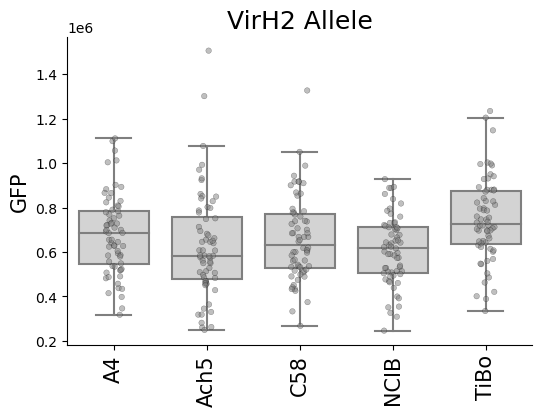

In [102]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirH2plot,palette=my_virH2_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirH2plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirH2 Allele',size=18)
#plt.savefig('2022.9.23_virH1allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

In [103]:
#virB1-11
dfvirB = pd.read_excel('2023.2.6 virB allele.xlsx',sheet_name='data')
dfvirB['GFP_log'] = dfvirB.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvirB.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,496367,WT,1,Top,18.921048
1,A2,418112,WT,1,Top,18.673530
2,A3,629010,WT,1,Top,19.262723
3,A4,472149,WT,1,Top,18.848883
4,A5,752435,WT,1,Bottom,19.521207


In [104]:
dfvirBsum=rp.summary_cont(dfvirB['GFP'].groupby(dfvirB['Strain']))
dfvirBsum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,64,2115.0469,739.6748,92.4593,1930.2816,2299.8121
Ach5,64,6404.7812,3393.8463,424.2308,5557.0237,7252.5388
C58,64,8152.5156,3498.3795,437.2974,7278.6464,9026.3848
Leaf,12,944.4167,56.9441,16.4383,908.2361,980.5972
NCIB,64,9561.6719,4780.1055,597.5132,8367.6370,10755.7067
Q15,64,1138.2812,111.0490,13.8811,1110.5420,1166.0205
T60,64,1818.0156,589.3651,73.6706,1670.7966,1965.2347
TiAB,64,6325.7812,4173.2413,521.6552,5283.3366,7368.2259
TiBo,64,7172.1562,3891.8125,486.4766,6200.0104,8144.3021


In [105]:
compvirB = mc.MultiComparison(dfvirB['GFP'], dfvirB['Strain'])
tblvirB, a1virB, a2virB = compvirB.allpairtest(stats.ttest_ind, method= "bonf")
print(tblvirB)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1   group2    stat    pval  pval_corr reject
-------------------------------------------------
    A4      Ach5  -9.8799    0.0       0.0   True
    A4       C58 -13.5077    0.0       0.0   True
    A4      Leaf   5.4497    0.0       0.0   True
    A4      NCIB -12.3161    0.0       0.0   True
    A4       Q15  10.4472    0.0       0.0   True
    A4       T60   2.5125 0.0133    0.7288  False
    A4      TiAB   -7.948    0.0       0.0   True
    A4      TiBo -10.2126    0.0       0.0   True
    A4        WT -31.1365    0.0       0.0   True
    A4 ΔvirB1-11   9.4566    0.0       0.0   True
  Ach5       C58  -2.8686 0.0048     0.266  False
  Ach5      Leaf   5.5429    0.0       0.0   True
  Ach5      NCIB   -4.308    0.0    0.0018   True
  Ach5       Q15  12.4076    0.0       0.0   True
  Ach5       T60  10.6525    0.0       0.0   True
  Ach5      TiAB   0.1175 0.9067       1.0  False
  Ach5 

In [107]:
dfvirBplot = dfvirB[dfvirB.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'TiAB',
       'T60', 'TiBo'])]

In [108]:
my_virb_pal = {'A4': 'red',
 'Ach5': 'lightgrey','Q15': 'red','T60':'red','TiAB':'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'TiBo': 'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirB Allele')

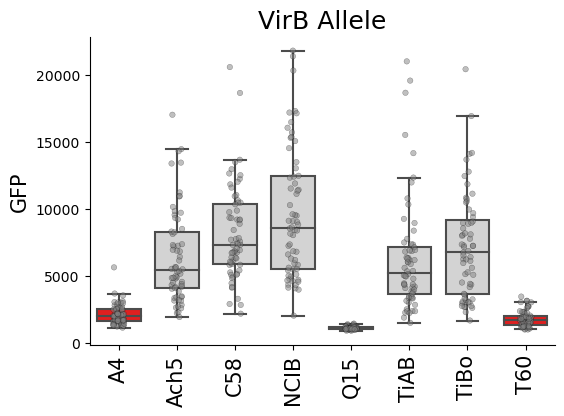

In [109]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirBplot,palette=my_virb_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirBplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirB Allele',size=18)

"""By using p101 to express D12 we increase by 135%, by using 114 to express D4 we improve by 72%, by using the S4 C12 allele we increase by 92%, by using the D4 TiBo allele we improve by 13%, by using the A4 D5 allele we improve by 30%, and if we use the T60 E3 allele we improve by 77%, all together 419%"""

In [94]:
#virB and pFreya 1.0 graphs